In [1]:
import dask

import pandas as pd
import netCDF4

import xarray as xr
import numpy as np

import pandas as pd
import dask.array as da
import ocetrac


import warnings
warnings.filterwarnings('ignore')
from datetime import date

import matplotlib.pyplot as plt
import matplotlib.cm as cm

print('loaded libraries')

loaded libraries


In [3]:
mt_path = "/pub/mariant3/WarmWaterMasses/02_tracking-mhws/"
dir_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/"
ds_global = xr.open_dataset(f"{dir_path}/data/ocean_daily_cmip.01860101-01901231.tos.nc")
static_global = xr.open_dataset(f"{dir_path}/data/ocean_daily_cmip.static.nc")
ds_static_global = xr.merge([static_global,ds_global])
ocetrac_labels = xr.open_mfdataset(f"{mt_path}/01860503-01901020_ocetrac-labels-globe.nc")

In [4]:
labels = ocetrac_labels['blobs']
#num_events = labels.attrs['final objects tracked']
#print(f"There are {num_events} total events tracked.")

In [5]:
global_blobs = labels

In [6]:
global_data = xr.merge([ds_global,global_blobs],join='inner')

In [7]:
ds_static_global = xr.merge([static_global,global_data],join='inner')
ds_static_global

<xarray.Dataset>
Dimensions:       (yh: 1080, xh: 1440, yq: 1080, xq: 1440, nv: 2, time: 855)
Coordinates:
  * xh            (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * xq            (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yh            (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * yq            (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
  * nv            (nv) float64 1.0 2.0
  * time          (time) object 0186-05-03 12:00:00 ... 0190-10-20 12:00:00
Data variables: (12/33)
    geolat        (yh, xh) float32 ...
    geolat_c      (yq, xq) float32 ...
    geolon        (yh, xh) float32 ...
    geolon_c      (yq, xq) float32 ...
    Coriolis      (yq, xq) float32 ...
    areacello     (yh, xh) float32 ...
    ...            ...
    average_DT    (time) timedelta64[ns] ...
    average_T1    (time) object ...
    average_T2    (time) object ...
    time_bnds     (time, nv) object ...
    tos           (time, yh, xh) float32 ...
    blobs         (time, yh, xh) float64 dask.array<chunksize=(855, 1080, 1440), meta=np.ndarray>
Attributes:
    external_variables:  areacello areacello

In [8]:
%%time
labels.compute();

CPU times: user 143 ms, sys: 3.94 s, total: 4.09 s
Wall time: 6.18 s


In [9]:
labels.load();

In [10]:
ids = np.unique(labels)
ids = np.array([id for id in ids if ~np.isnan(id)])
ids

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [11]:
num_events = len(ids)
num_events

256

In [12]:
for id in ids:
    print(id)
    #print(i)
    event = labels.where(labels==id, drop=True)
    #print(event)
    event_mask = event == event
    #print(event_mask)
    #event_date = event.time.values.astype('datetime64[D]')
    #print(event_date)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0
185.

In [13]:
ssta = ds_static_global.tos

In [14]:
import os, glob
import xarray as xr
import numpy as np
import pandas as pd
import warnings
from skimage.measure import label as label_np
from skimage.measure import regionprops 

try:
    from tqdm.auto import tqdm
    tqdm_avail = True
except:
    warnings.warn(
        "Optional dependency `tqdm` not found. This will make progressbars a lot nicer. \
    Install with `conda install -c conda-forge tqdm`"
    )
    tqdm_avail = False
    
def _wrap(labels):
    ''' Impose periodic boundary and wrap labels, then reorder the labels'''
    first_column = labels[..., 0]
    last_column = labels[..., -1]

    stacked = first_column.stack(z=['time','yh'])
    unique_first = np.unique(stacked[stacked.notnull()])

    # This loop iterates over the unique values in the first column, finds the location of those values in 
    # the first columnm and then uses that index to replace the values in the last column with the first column value
    for i in enumerate(unique_first):
        first = np.where(first_column == i[1])
        last = last_column[first[0], first[1]]
        stacked = last.stack(z=['time','yh'])
        bad_labels = np.unique(stacked[stacked.notnull()])
        replace = np.isin(labels, bad_labels)
        labels = labels.where(replace==False, other=i[1])
    
    labels = labels.fillna(0)
    labels_wrapped = np.unique(labels, return_inverse=True)[1].reshape(labels.shape)
    labels_wrapped = xr.DataArray(labels_wrapped, dims=labels.dims, coords=labels.coords)

    return labels_wrapped

def _get_labels(binary_images):
    '''function used to label binary images at each time step using skimage.measure.label'''
    blobs_labels = label_np(binary_images, background=0)
    return blobs_labels
    
def _get_centroids(sub_labels):
    '''This function uses skimage.measure.regionprops to find the centroids of objects assigned 
    to each unique label'''
    props = regionprops(sub_labels.astype('int'))
    centroids = [(float(sub_labels.yh[round(p.centroid[0])].values),
                  float(sub_labels.xh[round(p.centroid[1])].values)) for p in props]
    for i in range(0,len(centroids)):
        if centroids[i][1] >= 359.875:
            centroids[i] = (centroids[i][0], list(centroids[i])[1] - 359.875)
    
    return centroids

def _get_intensity_area(event, ssta, mhw):
    '''Calculates event intensities and area at each time interval using anomaly data and coordinates 
    cooresponding to the event.'''
    
    event_ssta = ssta.where(event>0, drop=True)        
    event_ssta_mask = event_ssta == event_ssta
    #mhw['intensity_mean'].append(event_ssta.mean(('yh','xh')).values)
    #mhw['intensity_max'].append(event_ssta.max(('yh','xh')).values) 
    #mhw['intensity_min'].append(event_ssta.min(('yh','xh')).values)
    mhw['intensity_mean'].append((ds_static_global.tos).where(event_ssta_mask).mean(['xh','yh']).values)
    mhw['intensity_min'].append((ds_static_global.tos).where(event_ssta_mask).min(['xh','yh']).values)
    mhw['intensity_max'].append((ds_static_global.tos).where(event_ssta_mask).max(['xh','yh']).values)
   
    #event_temperature_max = (ds_static_region.tos).where(event_mask).sel(xh = slice(-138, 0), yh = slice(8, 49)).max(['xh','yh'])
 
    mhw['intensity_cumulative'].append(np.nansum(event_ssta))
    coords = event.stack(z=('yh','xh'))
    coord_pairs = [(coords.isel(time=t[0]).dropna(dim='z', how='any').z.yh.values, 
                      coords.isel(time=t[0]).dropna(dim='z', how='any').z.xh.values) for t in enumerate(event.time)]

    mhw['coords'].append(coord_pairs)
    
    # Calculate weighted cell area assuming 0.25º resolution data and 111 km per degree of latitude
    
    #for id in ids:
        #print(id)
        #print(i)
        #events = labels.where(labels==id, drop=True)
        #event_mask = events == id
   # event_area
    #event_mask = events == event
    event_ssta_mask = event_ssta == event_ssta
    #print(event_ssta == event_ssta)
    #print(event_ssta.areacello.sum(('yh','xh')).values)
    event_area = (ds_static_global.areacello).where(event_ssta_mask).sum(['xh','yh'])
    #print(event_area.values)
    cell_area = event_area.values
    mhw['area'].append(cell_area)
    

    #y, x = zip(*coord_pairs)
    #dlon = [np.cos(y[c]*np.pi/180)*(111*.25) for c in np.arange(0, len(coord_pairs))]
    #dlat = (111*.25) * np.ones(len(dlon))
    #cell_area = [np.sum(dlon[c]*dlat[c]) for c in np.arange(0, len(coord_pairs))]
    #mhw['area'].append(cell_area)

    
    return mhw

In [15]:
def _get_metrics(event, ssta):
    '''
    Creates a Pandas DataFrame of event attributes.
    
    Parameters
    ----------
      event : xarray.DataArray   
              Image set containing only objects corresponding to the event of interest. 
              Dimensions should be ('time', 'lat', 'lon')
              
      ssta  : xarray.DataArray
              Temperature vector [1D numpy array of length T]
    
    Returns
    -------
    
    mhw : pandas.DataFrame
          Marine heat wave event attributes. The keys listed below are 
          are contained within the dataset.
 
        'id'                     Unique label given to the MHW [int]
        'date'                   Dates corresponding to the event [datetime format]
        'coords'                 Latitude and longitude of all points contained in the event [tuple(lat,lon)]
        'centroid'               Center of each object contained in the event [tuple(lat,lon)]
        'duration'               Duration of event [months]
        'intensity_max'          Maximum intensity at each time interval [degC]
        'intensity_mean'         Mean intensity at each time interval [degC]
        'intensity_min'          Minimum intensity at each time interval [degC]
        'intensity_cumulative'   Cumulated intensity over the entire event [degC months]
        'area'                   Area of the event at each time interval [km2]
        
    '''
    
    # Initialize dictionary 
    mhw = {}
    mhw['id'] = [] # event label
    mhw['date'] = [] # datetime format
    mhw['coords'] = [] # (lat, lon)
    mhw['centroid'] = []  # (lat, lon)
    mhw['duration'] = [] # [months]
    mhw['intensity_max'] = [] # [deg C]
    mhw['intensity_mean'] = [] # [deg C]
    mhw['intensity_min'] = [] # [deg C]
    mhw['intensity_cumulative'] = [] # [deg C]
    mhw['area'] = [] # [km2]

    # TO ADD:
    # mhw['rate_onset'] = [] # [deg C / month]
    # mhw['rate_decline'] = [] # [deg C / month]

    mhw['id'].append(int(np.nanmedian(event.values)))
    mhw['date'].append(event.time.values.astype('datetime64[D]'))
    mhw['duration'].append(event.time.shape[0])

    # Turn images into binary
    binary_event = event.where(event>=0, other=0)
    binary_event = binary_event.where(binary_event==0, other=1)
      
    sub_labels = xr.apply_ufunc(_get_labels, binary_event,
                                input_core_dims=[['yh', 'xh']],
                                output_core_dims=[['yh', 'xh']],
                                output_dtypes=[binary_event.dtype],
                                vectorize=True,
                                dask='parallelized')
    
    # Turn background to NaNs
    sub_labels = xr.DataArray(sub_labels, dims=binary_event.dims, coords=binary_event.coords)
    sub_labels = sub_labels.where(sub_labels>0, drop=False, other=np.nan) 

    # The labels are repeated each time step, therefore we relabel them to be consecutive
    for p in range(1, sub_labels.shape[0]):
        sub_labels[p,:,:] = sub_labels[p,:,:].values + sub_labels[p-1,:,:].max().values
    
    sub_labels_wrapped = _wrap(sub_labels)
    
    mhw = _get_intensity_area(event, ssta, mhw)
    
 # '  centroid = []
 #   for s in np.arange(0, sub_labels_wrapped.shape[0]):
 #       lx = sub_labels_wrapped.isel(time=s)
 #       east = lx.where(lx.xh < 180, drop=True)
 #       east['xh'] = labels.xh
 #       append_east = xr.concat([lx.where(lx.xh >= 180, drop=True), east], dim="xh")
#        centroid.append(_get_centroids(append_east))
#    mhw['centroid'].append(centroid)'
    
    mhw = pd.DataFrame(dict([(name, pd.Series(data)) for name,data in mhw.items()]))
#     mhw.to_csv('df_'+str(mhw['id'].values[0]).zfill(4)+'.csv', index=False)
    return mhw


In [16]:
dataframes = []  
for i in range(0,num_events):
    print(ids[i])
    event = labels.where(labels==ids[i], drop=True)
    df = _get_metrics(event, ssta)
    dataframes.append(df)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0
185.

In [17]:
dff = pd.concat(dataframes, ignore_index=True)

In [18]:
dff

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area
0,1,"[0186-05-03, 0186-05-04, 0186-05-05, 0186-05-0...","[([-9.21007812156814, -9.21007812156814, -9.21...",NaN,34,"[32.887207, 33.00415, 33.063168, 33.15836, 33....","[29.608562, 29.658926, 29.67992, 29.765705, 29...","[26.511286, 26.664972, 26.85391, 27.001102, 26...",1.446968e+07,"[14270538000000.0, 13362650000000.0, 140240920..."
1,2,[0186-05-03],"[([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24999920672...",NaN,1,[29.845846],[29.128826],[28.306025],1.441877e+04,[382360940000.0]
2,3,"[0186-05-09, 0186-05-10, 0186-05-11, 0186-05-1...","[([10.687478569214495, 10.687478569214495, 10....",NaN,16,"[30.577562, 30.524511, 30.282787, 29.90784, 29...","[29.438, 29.407696, 29.413874, 29.358849, 29.3...","[28.607817, 28.37463, 28.442465, 28.612474, 28...",5.607258e+05,"[380071300000.0, 696309500000.0, 792936900000...."
3,4,[0186-05-27],"[([3.9967547010414073, 3.9967547010414073, 3.9...",NaN,1,[29.367353],[29.140228],[28.749264],1.331708e+04,[350532700000.0]
4,5,"[0186-05-30, 0186-05-31, 0186-06-01]","[([10.687478569214495, 10.687478569214495, 10....",NaN,3,"[30.352192, 30.683998, 30.869896]","[29.494673, 29.538881, 29.602905]","[28.488447, 28.519936, 28.575197]",4.062350e+04,"[348537360000.0, 335577350000.0, 327681900000.0]"
...,...,...,...,...,...,...,...,...,...,...
251,252,[0190-09-27],"[([18.186678776990284, 18.186678776990284, 18....",NaN,1,[31.19624],[29.413017],[28.652298],1.352999e+04,[312604160000.0]
252,253,[0190-10-04],"[([14.105322883430246, 14.105322883430246, 14....",NaN,1,[31.830257],[30.215403],[28.927935],1.320413e+04,[303718400000.0]
253,254,"[0190-10-05, 0190-10-06, 0190-10-07, 0190-10-0...","[([-6.237641830626559, -6.237641830626559, -6....",NaN,11,"[30.922161, 31.141644, 31.267267, 31.339643, 3...","[29.431765, 29.515785, 29.55941, 29.607147, 29...","[28.663006, 28.589237, 28.438332, 28.554108, 2...",1.582111e+05,"[402205840000.0, 453846500000.0, 502059100000...."
254,255,[0190-10-10],"[([9.456768240176679, 9.456768240176679, 9.456...",NaN,1,[29.469902],[29.194649],[28.976725],1.424699e+04,[360861070000.0]


In [19]:
import pickle

In [20]:
dff.to_pickle(f"{mt_path}/01860503-01901020_mhw-metrics-global.pkl")

In [21]:
test_df = pd.read_pickle(f"{mt_path}/01860503-01901020_mhw-metrics-global.pkl")
test_df

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area
0,1,"[0186-05-03, 0186-05-04, 0186-05-05, 0186-05-0...","[([-9.21007812156814, -9.21007812156814, -9.21...",NaN,34,"[32.887207, 33.00415, 33.063168, 33.15836, 33....","[29.608562, 29.658926, 29.67992, 29.765705, 29...","[26.511286, 26.664972, 26.85391, 27.001102, 26...",1.446968e+07,"[14270538000000.0, 13362650000000.0, 140240920..."
1,2,[0186-05-03],"[([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24999920672...",NaN,1,[29.845846],[29.128826],[28.306025],1.441877e+04,[382360940000.0]
2,3,"[0186-05-09, 0186-05-10, 0186-05-11, 0186-05-1...","[([10.687478569214495, 10.687478569214495, 10....",NaN,16,"[30.577562, 30.524511, 30.282787, 29.90784, 29...","[29.438, 29.407696, 29.413874, 29.358849, 29.3...","[28.607817, 28.37463, 28.442465, 28.612474, 28...",5.607258e+05,"[380071300000.0, 696309500000.0, 792936900000...."
3,4,[0186-05-27],"[([3.9967547010414073, 3.9967547010414073, 3.9...",NaN,1,[29.367353],[29.140228],[28.749264],1.331708e+04,[350532700000.0]
4,5,"[0186-05-30, 0186-05-31, 0186-06-01]","[([10.687478569214495, 10.687478569214495, 10....",NaN,3,"[30.352192, 30.683998, 30.869896]","[29.494673, 29.538881, 29.602905]","[28.488447, 28.519936, 28.575197]",4.062350e+04,"[348537360000.0, 335577350000.0, 327681900000.0]"
...,...,...,...,...,...,...,...,...,...,...
251,252,[0190-09-27],"[([18.186678776990284, 18.186678776990284, 18....",NaN,1,[31.19624],[29.413017],[28.652298],1.352999e+04,[312604160000.0]
252,253,[0190-10-04],"[([14.105322883430246, 14.105322883430246, 14....",NaN,1,[31.830257],[30.215403],[28.927935],1.320413e+04,[303718400000.0]
253,254,"[0190-10-05, 0190-10-06, 0190-10-07, 0190-10-0...","[([-6.237641830626559, -6.237641830626559, -6....",NaN,11,"[30.922161, 31.141644, 31.267267, 31.339643, 3...","[29.431765, 29.515785, 29.55941, 29.607147, 29...","[28.663006, 28.589237, 28.438332, 28.554108, 2...",1.582111e+05,"[402205840000.0, 453846500000.0, 502059100000...."
254,255,[0190-10-10],"[([9.456768240176679, 9.456768240176679, 9.456...",NaN,1,[29.469902],[29.194649],[28.976725],1.424699e+04,[360861070000.0]


In [18]:
#dff.to_csv(f"{mt_path}/01860503-01901020_metrics-global.csv", index=False)

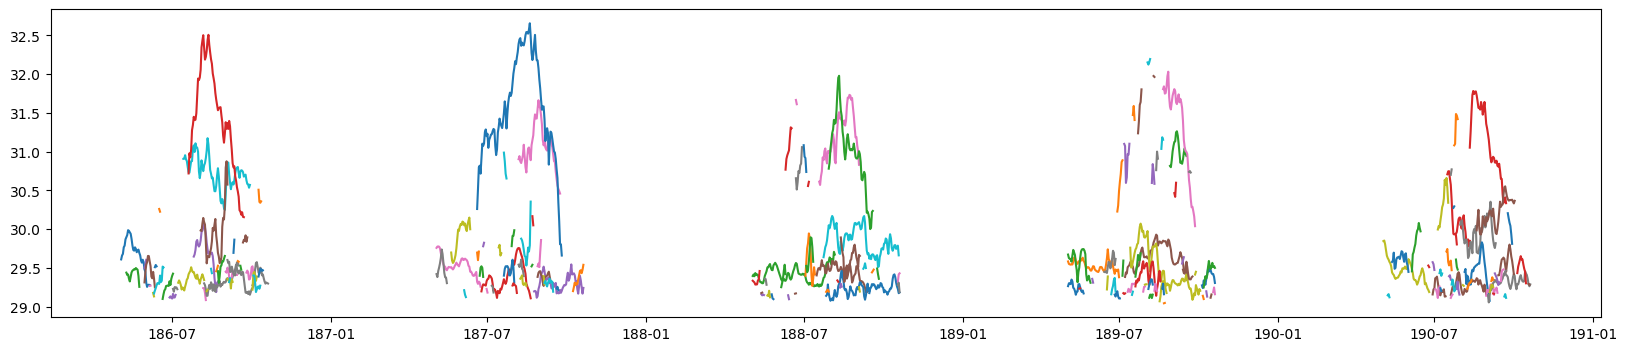

In [19]:
plt.figure(figsize=(20,4))
for i in range(len(dff['intensity_mean'].values)):
    plt.plot(dff.date[i], dff.intensity_mean[i])
plt.show()

Text(0.5, 1.0, 'Duration (global)')

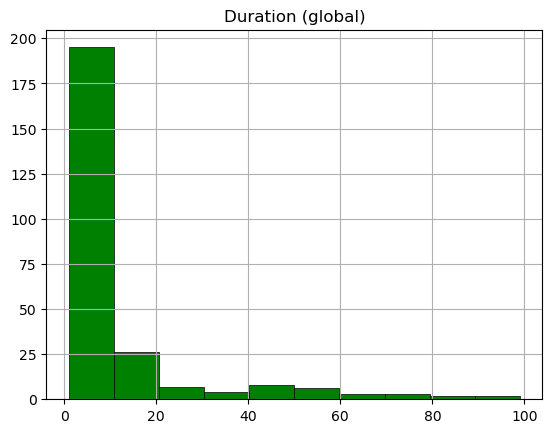

In [54]:
dff.duration.hist(color = "g", ec="k",lw=.5)
plt.title('Duration (global)')

In [21]:
max_intensity_global = []
for i in range(len(dff['intensity_max'].values)):
    max_intensity_global += [np.max(dff['intensity_max'].values[i]) - 29]

In [22]:
areaplot_global = []
for i in range(len(dff['intensity_max'].values)):
    areaplot_global += [np.max(dff['area'].values[i])]

Text(0.5, 1.0, 'Area (global)')

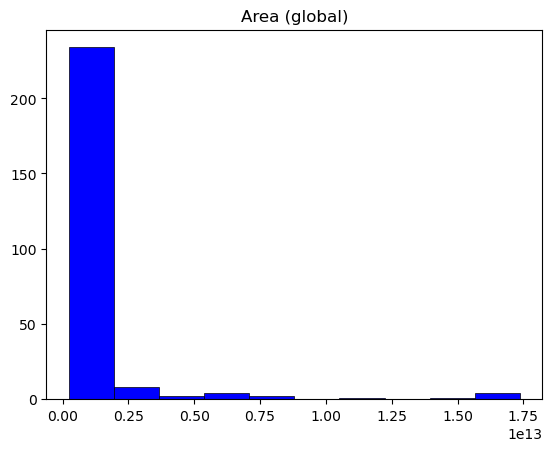

In [48]:
plt.hist(areaplot_global, color = "blue", ec="k",lw=.5)
plt.title('Area (global)')

Text(0.5, 1.0, 'Max Intensity (global)')

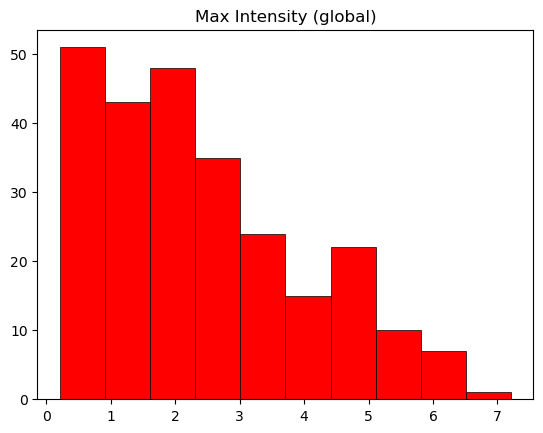

In [55]:
plt.hist(max_intensity_global, color = "red", ec="k",lw=.5)
plt.title('Max Intensity (global)')

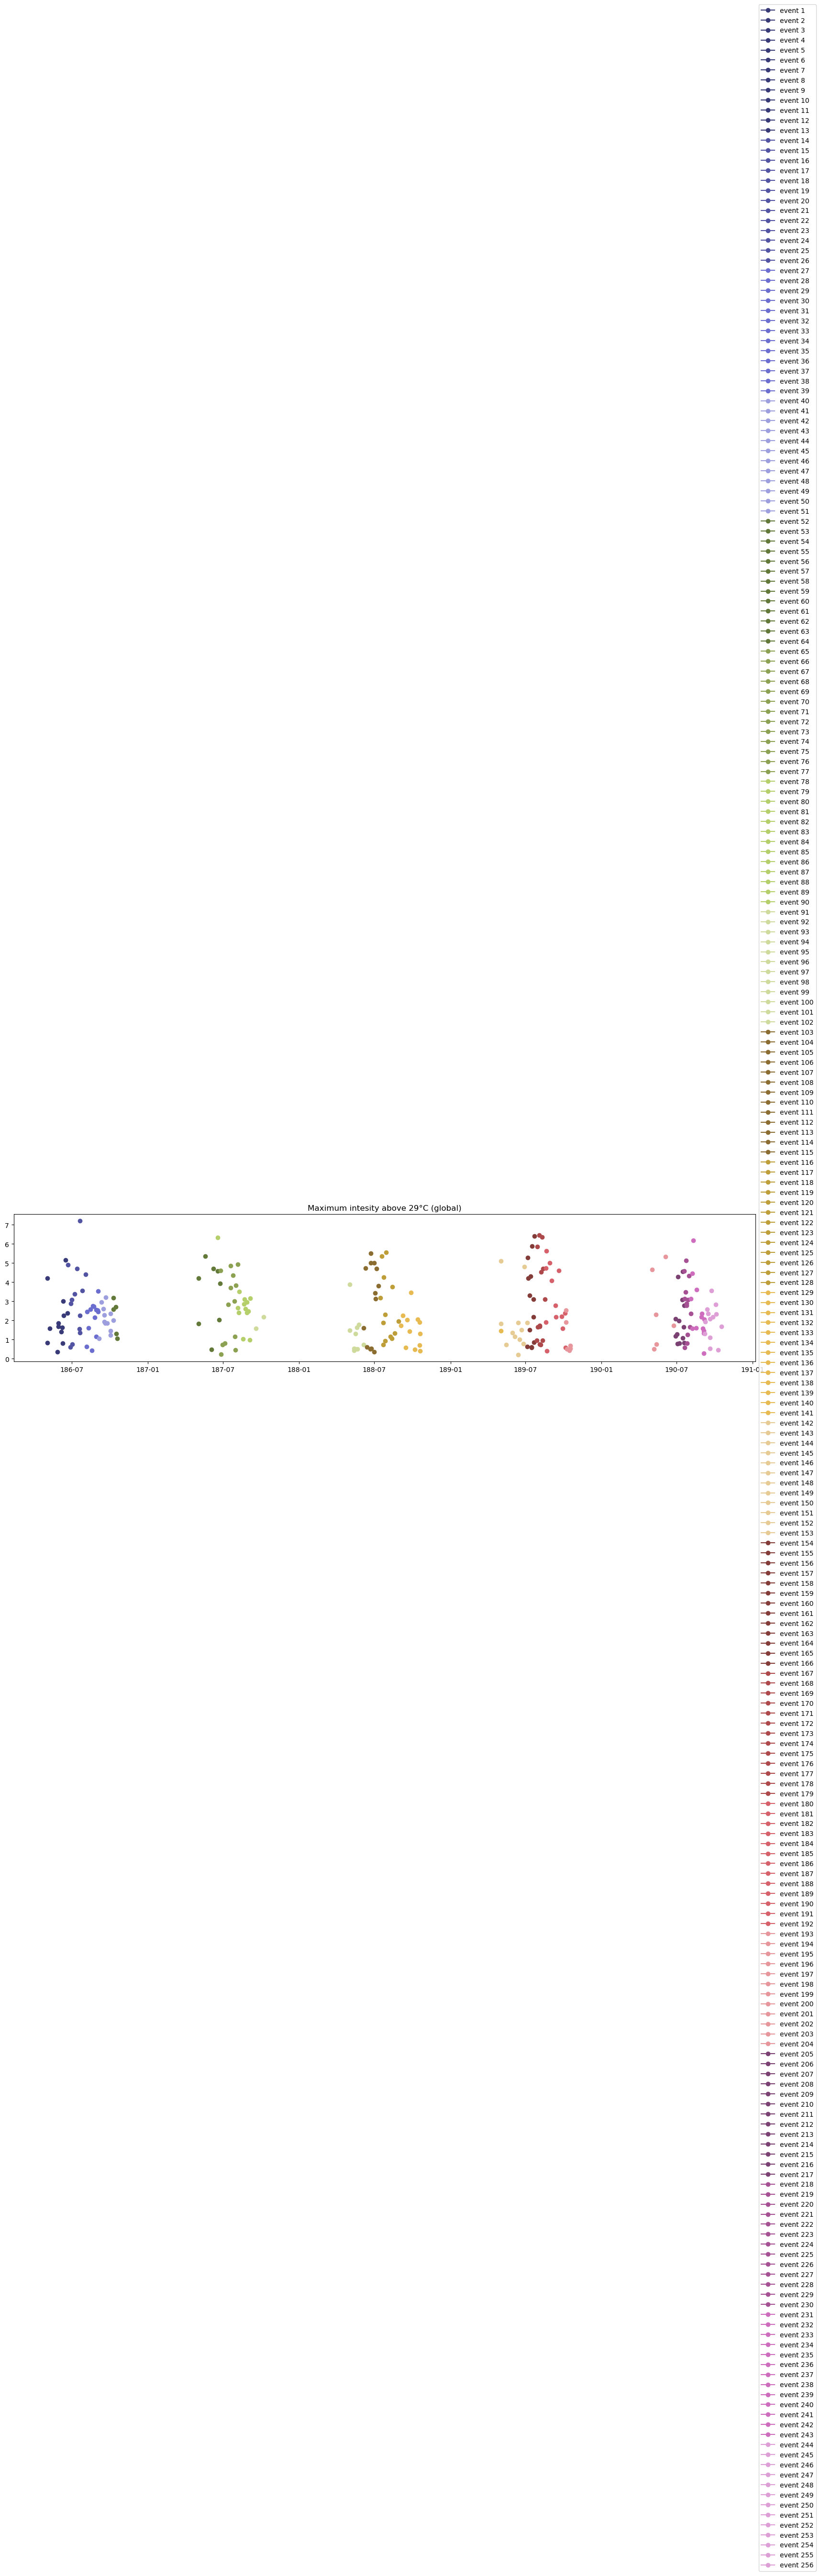

In [49]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 4))

# Generate a colormap based on the number of data points
cmap = plt.get_cmap('tab20b')
colors = cmap(np.linspace(0, 1, len(dff['intensity_mean'].values)))

# Plot each point with a different color from the colormap
for i in range(len(dff['intensity_mean'].values)):
    plt.plot(dff.date[i][0], max_intensity_global[i], marker='o', color=colors[i], label=f'event {dff.id[i]}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Maximum intesity above 29°C (global)')
plt.show()


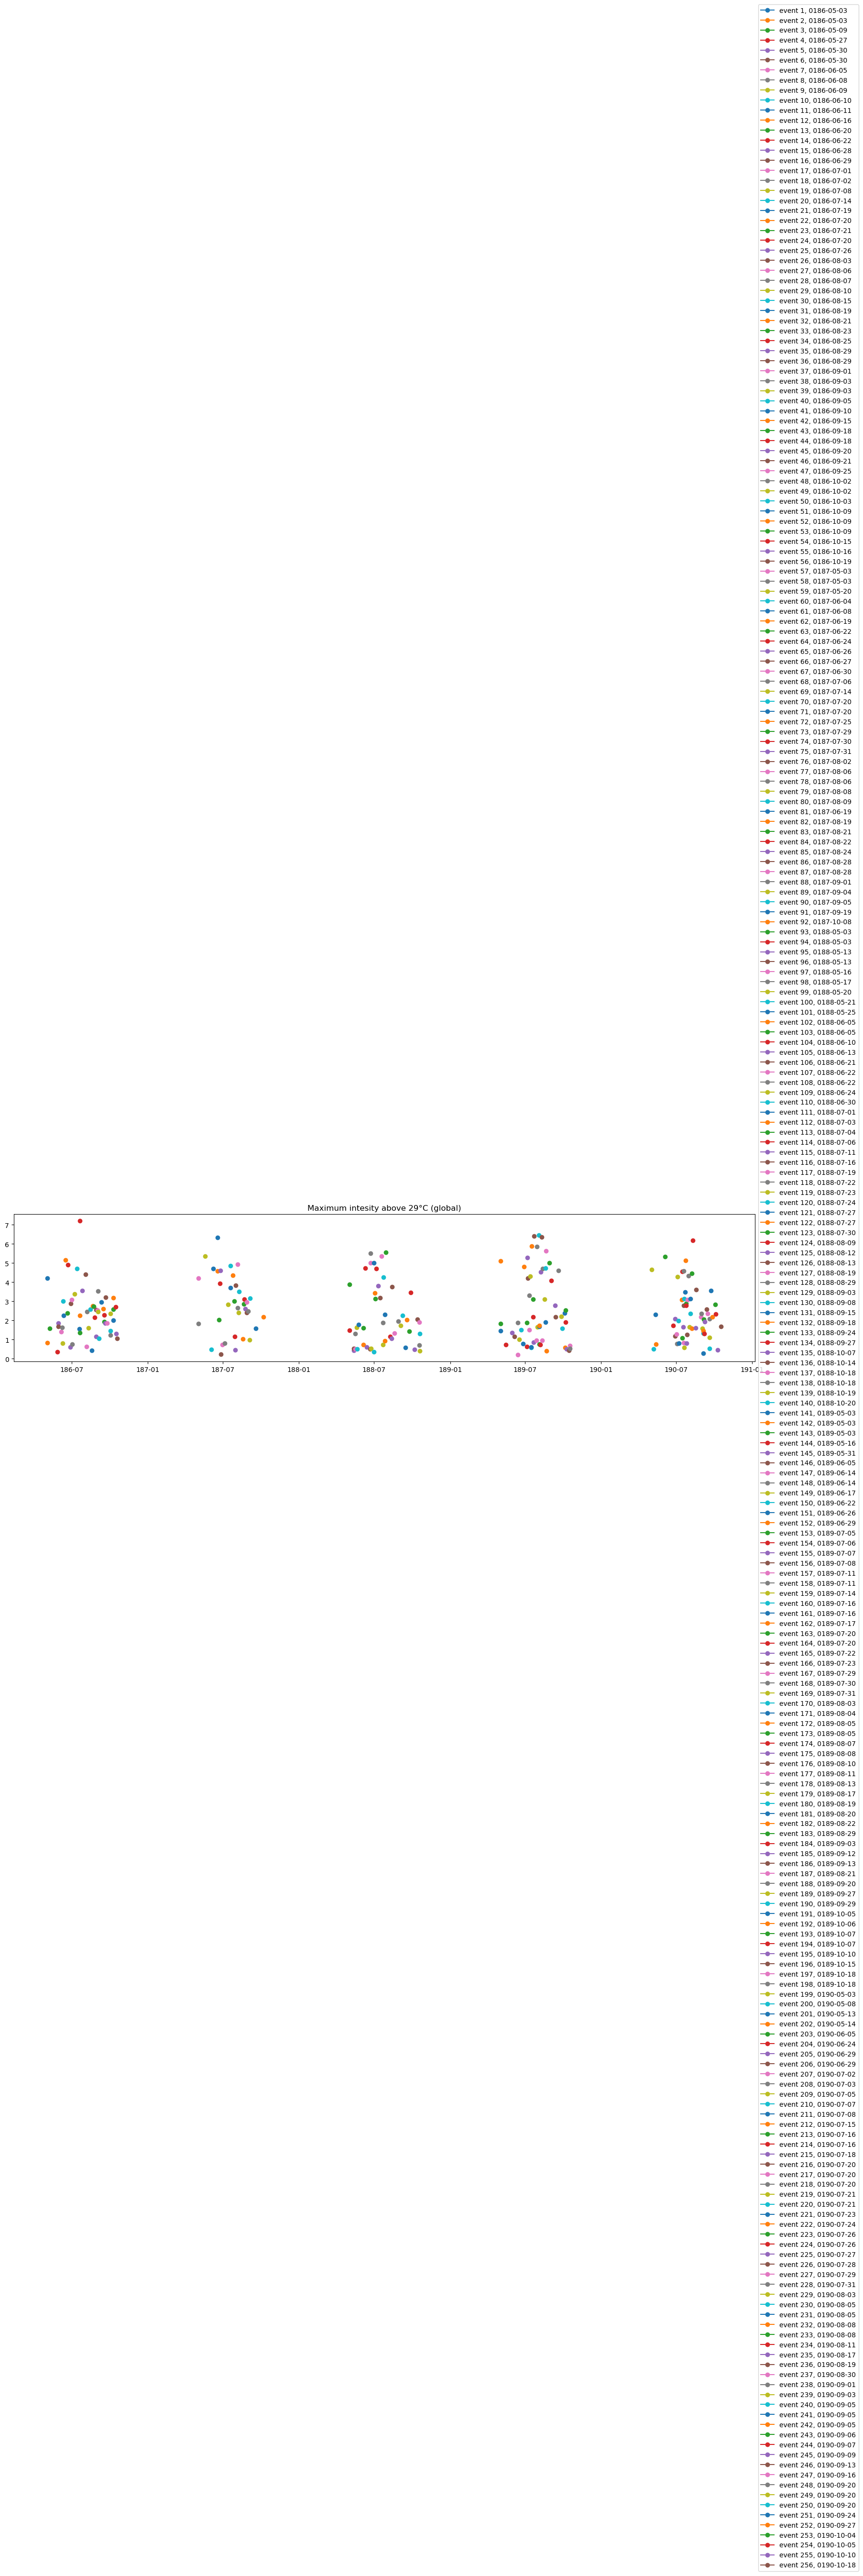

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 4))

# Generate a colormap based on the number of data points
cmap = plt.get_cmap('tab20b')
colors = cmap(np.linspace(0, 1, len(dff['intensity_mean'].values)))

# Plot each point with a different color from the colormap
for i in range(len(dff['intensity_mean'].values)):
    plt.plot(dff.date[i][0], max_intensity_global[i], marker='o', label=f'event {dff.id[i]}, {dff.date[i][0]}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Maximum intesity above 29°C (global)')
plt.show()



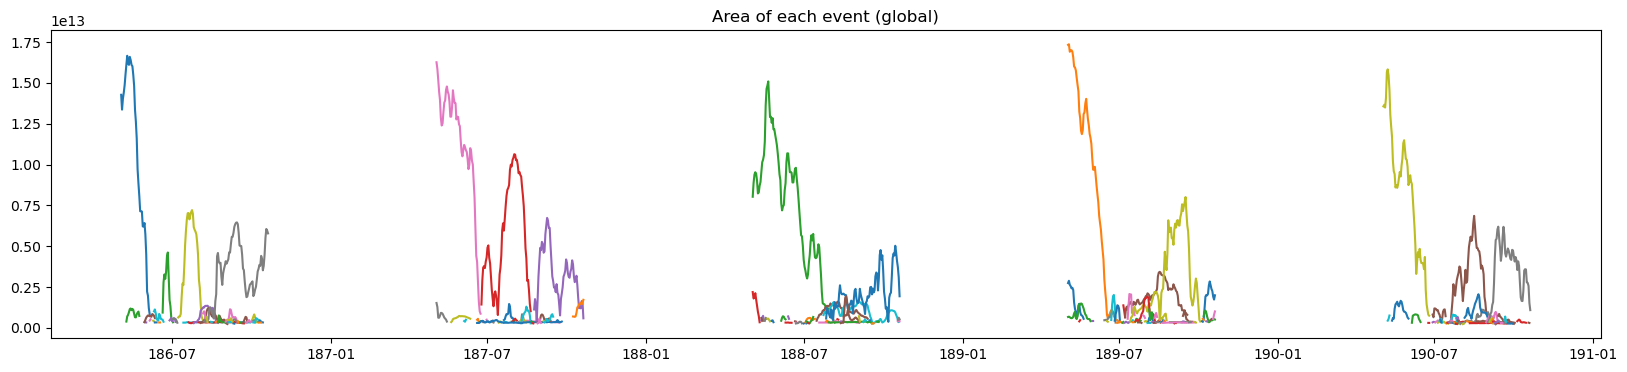

In [52]:
plt.figure(figsize=(20,4))
for i in range(len(dff['intensity_mean'].values)):
    plt.plot(dff.date[i], dff.area[i])

plt.title('Area of each event (global)')
plt.show()

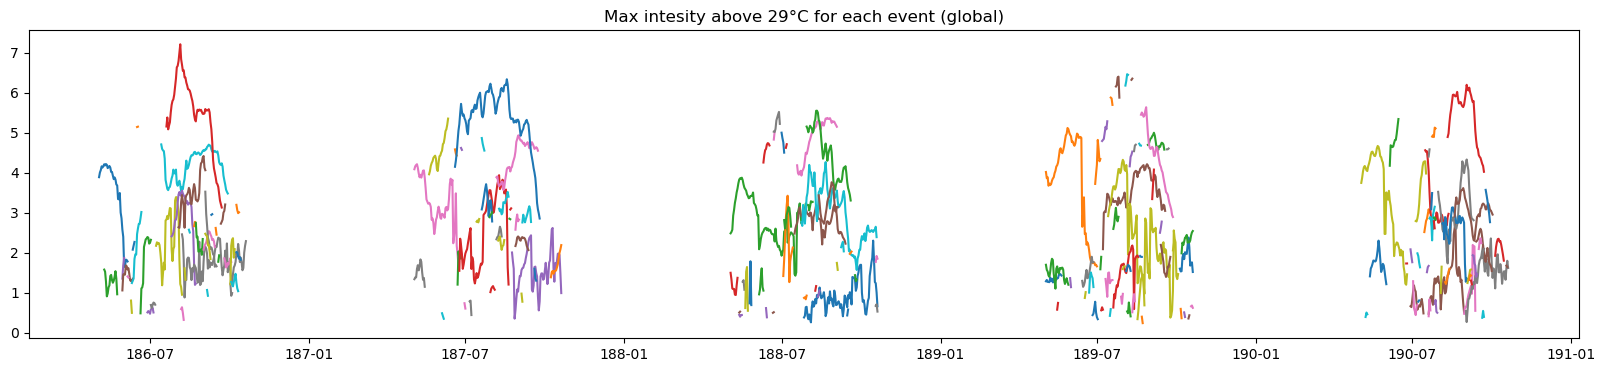

In [57]:
plt.figure(figsize=(20,4))
for i in range(len(dff['intensity_mean'].values)):
    plt.plot(dff.date[i], dff.intensity_max[i]- 29)
plt.title('Max intesity above 29°C for each event (global)')
plt.show()